## This notebook assumes you have the following packages installed in your conda environment.

In [7]:
import pandas as pd
import json
import community
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import randomcolor

In [8]:
df_default = pd.read_csv('../data/signdata_updated11-18.csv', encoding='latin-1')
df_default.shape
df_old = pd.read_csv('../data/signdata-11-5-20.csv')
df_old_subset = df_old[['Code','YouTube Video', 'VimeoVideo', 'VimeoVideoHTML']].copy()
df_default = df_default.merge(df_old_subset, on='Code', how='left')
df_default.head()

,EntryID,LemmaID,Code,Batch,List,Item,EnglishWF(lg10),SignFrequency(M),SignFrequency(SD),SignFrequency(Z),...,SignBankLemmaID,SignBankSemanticField,SignBankReferenceID,InCDI,CDISemanticCategory,bglm_aoa,empirical_aoa,YouTube Video,VimeoVideo,VimeoVideoHTML
0,tree,tree,A_01_002,A,1,2,3.521,5.143,2.081,0.621,...,TREE,None,342.0,Yes,Outside Things and Places to Go,22.0,14.0,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216264,<iframe src=https://player.vimeo.com/video/344...
1,night,night,A_01_003,A,1,3,4.645,6.032,1.516,1.068,...,NIGHT,None,199.0,Yes,Signs About Time,31.0,18.0,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216312,<iframe src=https://player.vimeo.com/video/344...
2,hamburger,hamburger,A_01_004,A,1,4,2.600,4.429,1.720,0.232,...,HAMBURGER,None,1844.0,Yes,Food and Drink,32.0,28.0,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216345,<iframe src=https://player.vimeo.com/video/344...
3,nephew,nephew,A_01_005,A,1,5,2.928,2.621,1.720,-0.753,...,NEPHEW,People,3011.0,No,NaN,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216367,<iframe src=https://player.vimeo.com/video/344...
4,castle,castle,A_01_008,A,1,8,3.041,1.579,0.838,-1.198,...,CASTLE,None,2471.0,No,Action Signs,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216403,<iframe src=https://player.vimeo.com/video/344...


In [9]:
df_subset = df_default[['EntryID', 'LemmaID','Code','YouTube Video', 'VimeoVideo', 'Phonological Complexity']]

In [10]:
df_subset.to_csv('signdata_with_urls.csv')

In [11]:
len(df_default["Code"].values)

2723

## Community Analysis

In [12]:
edges_df = pd.read_csv('../data/generated-data/default-neighbors.csv') 
edges_df = edges_df.rename(columns={"neighbor": "source"})
edges_df.head()


,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
1,A_01_002,C_03_023,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,Flexion.2.0
2,A_01_002,G_01_038,12,"SignType.2.0, MinorLocation.2.0, Contact.2.0, ...",1,Movement.2.0
3,A_01_002,J_03_046,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
4,A_01_003,D_02_047,14,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",0,NaN


In [13]:
edges_df.shape

(13556, 6)

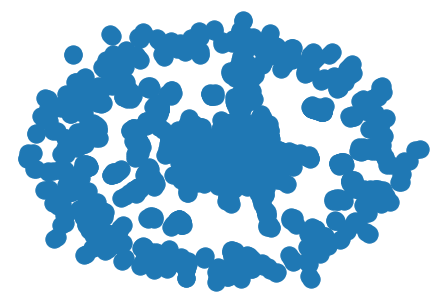

In [14]:
g = nx.from_pandas_edgelist(edges_df, source='source', target='target') 
nx.draw(g)

In [15]:
#first compute the best partition
# from community import greedy_modularity_communities
import community

G = g

#Two methods for community analysis
# c = greedy_modularity_communities(G)
partition = community.best_partition(G)

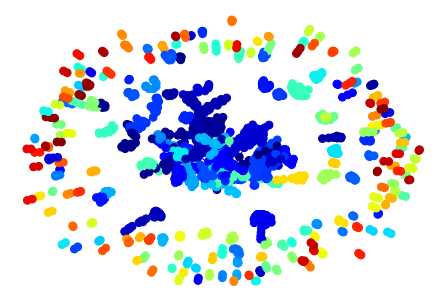

In [16]:
values = [partition.get(node) for node in G.nodes()]

nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=60, with_labels=False)

In [17]:
# num_nodes = 0
# for community in c:
#     num_nodes += len(community)
# print(num_nodes)

In [18]:
len(partition)

2068

In [19]:
#Noes only connected by edges. Does not include standalone nodes.

list = partition.items()
print(len(list))
df_with_groupids = pd.DataFrame(list, columns=['Code', 'group_id'])
df_with_groupids.head()

2068


,Code,group_id
0,B_01_062,0
1,A_01_002,0
2,C_03_023,0
3,G_01_038,0
4,J_03_046,0


In [20]:
# get edges only where source and target nodes belong to a valid community for now. This is to assign them group ids.
nodes_in_communities = df_with_groupids['Code'].unique()
edges_for_community_nodes_df = edges_df.loc[edges_df['source'].isin(nodes_in_communities) & edges_df['target'].isin(nodes_in_communities)]
print(len(edges_for_community_nodes_df['source'].unique()))
print(edges_df.shape)
print(edges_for_community_nodes_df.shape)
edges_for_community_nodes_df.head()

2068
(13556, 6)
(13556, 6)


,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
1,A_01_002,C_03_023,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,Flexion.2.0
2,A_01_002,G_01_038,12,"SignType.2.0, MinorLocation.2.0, Contact.2.0, ...",1,Movement.2.0
3,A_01_002,J_03_046,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
4,A_01_003,D_02_047,14,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",0,NaN


In [21]:

df_merged = pd.merge(df_default, df_with_groupids,how='left', on=['Code'])
print(df_merged.shape)
df_merged.head(20)

(2723, 189)


,EntryID,LemmaID,Code,Batch,List,Item,EnglishWF(lg10),SignFrequency(M),SignFrequency(SD),SignFrequency(Z),...,SignBankSemanticField,SignBankReferenceID,InCDI,CDISemanticCategory,bglm_aoa,empirical_aoa,YouTube Video,VimeoVideo,VimeoVideoHTML,group_id
0,tree,tree,A_01_002,A,1,2,3.521,5.143,2.081,0.621,...,None,342.0,Yes,Outside Things and Places to Go,22.0,14.0,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216264,<iframe src=https://player.vimeo.com/video/344...,0.0
1,night,night,A_01_003,A,1,3,4.645,6.032,1.516,1.068,...,None,199.0,Yes,Signs About Time,31.0,18.0,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216312,<iframe src=https://player.vimeo.com/video/344...,1.0
2,hamburger,hamburger,A_01_004,A,1,4,2.600,4.429,1.720,0.232,...,None,1844.0,Yes,Food and Drink,32.0,28.0,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216345,<iframe src=https://player.vimeo.com/video/344...,2.0
3,nephew,nephew,A_01_005,A,1,5,2.928,2.621,1.720,-0.753,...,People,3011.0,No,NaN,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216367,<iframe src=https://player.vimeo.com/video/344...,NaN
4,castle,castle,A_01_008,A,1,8,3.041,1.579,0.838,-1.198,...,None,2471.0,No,Action Signs,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216403,<iframe src=https://player.vimeo.com/video/344...,3.0
5,humble,humble,A_01_009,A,1,9,2.700,3.200,1.031,-0.418,...,Attribute,2940.0,No,NaN,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216431,<iframe src=https://player.vimeo.com/video/344...,4.0
6,cup,cup,A_01_010,A,1,10,3.421,5.742,1.413,0.909,...,None,388.0,No,NaN,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216455,<iframe src=https://player.vimeo.com/video/344...,5.0
7,english,english,A_01_011,A,1,11,3.577,4.645,1.496,0.326,...,None,1311.0,No,NaN,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216483,<iframe src=https://player.vimeo.com/video/344...,NaN
8,eyeglasses,eyeglasses,A_01_012,A,1,12,1.544,3.905,1.221,0.329,...,None,468.0,No,NaN,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216509,<iframe src=https://player.vimeo.com/video/344...,NaN
9,tie,tie,A_01_013,A,1,13,3.355,2.143,1.195,-0.751,...,None,3143.0,No,NaN,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216543,<iframe src=https://player.vimeo.com/video/344...,6.0


In [22]:
values = {'group_id': 1000}
df_merged = df_merged.fillna(value=values)

print(df_merged['group_id'])
unique_community_ids = df_merged['group_id'].unique()
unique_community_ids

0          0.0
1          1.0
2          2.0
3       1000.0
4          3.0
         ...  
2718    1000.0
2719       4.0
2720    1000.0
2721       2.0
2722      92.0
Name: group_id, Length: 2723, dtype: float64


array([   0.,    1.,    2., 1000.,    3.,    4.,    5.,    6.,    7.,
          8.,    9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,
         17.,   18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,
         26.,   27.,   28.,   29.,   30.,   31.,   32.,   33.,   34.,
         35.,   36.,   37.,   38.,   39.,   40.,   41.,   42.,   43.,
         44.,   45.,   46.,   47.,   48.,   49.,   50.,   51.,   52.,
         53.,   54.,   55.,   56.,   57.,   58.,   59.,   60.,   61.,
         62.,   63.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,
         71.,   72.,   73.,   74.,   75.,   76.,   77.,   78.,   79.,
         80.,   81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,
         89.,   90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,
         98.,   99.,  100.,  101.,  102.,  103.,  104.,  105.,  106.,
        107.,  108.,  109.,  110.,  111.,  112.,  113.,  114.,  115.,
        116.,  117.,  118.,  119.,  120.,  121.,  122.,  123.,  124.,
        125.,  126.,

In [23]:

#Will assign all NaN's same color for now. That's okay.


import random
 
def colors(n):
    if(n == 0):
        n = 600
    r = int(random.random() * 256)
    g = int(random.random() * 256)
    b = int(random.random() * 256)
    
    step = 256 / n
#     print(n,r,g,b,step)

    r += step
    g += step
    b += step
    r = int(r) % 256
    g = int(g) % 256
    b = int(b) % 256
    
    colorstr = str(r)+","+str(b)+"," + str(g)
    return '#%02x%02x%02x' % (r, g, b)

color_dict = []
color_dictionary = {}
for groupid in unique_community_ids:
    #generate a random color
    color = colors(groupid)
    if(groupid == 1000):        
        color_dict.append({'group_id': 1000, 'color_code': color})
        color_dictionary['island'] = color
    else:        
        color_dict.append({'group_id':groupid , 'color_code': color})
        color_dictionary[str(int(groupid))] = color
    
color_dict

[{'group_id': 0.0, 'color_code': '#b382c8'},
 {'group_id': 1.0, 'color_code': '#f6aa40'},
 {'group_id': 2.0, 'color_code': '#6978dd'},
 {'group_id': 1000, 'color_code': '#0e815c'},
 {'group_id': 3.0, 'color_code': '#7b2895'},
 {'group_id': 4.0, 'color_code': '#b30d5c'},
 {'group_id': 5.0, 'color_code': '#b23906'},
 {'group_id': 6.0, 'color_code': '#e48c3f'},
 {'group_id': 7.0, 'color_code': '#115435'},
 {'group_id': 8.0, 'color_code': '#511c63'},
 {'group_id': 9.0, 'color_code': '#821bf2'},
 {'group_id': 10.0, 'color_code': '#525674'},
 {'group_id': 11.0, 'color_code': '#e49f85'},
 {'group_id': 12.0, 'color_code': '#631b07'},
 {'group_id': 13.0, 'color_code': '#8f3251'},
 {'group_id': 14.0, 'color_code': '#79779b'},
 {'group_id': 15.0, 'color_code': '#4b5231'},
 {'group_id': 16.0, 'color_code': '#dc2ab0'},
 {'group_id': 17.0, 'color_code': '#13fe96'},
 {'group_id': 18.0, 'color_code': '#5f87eb'},
 {'group_id': 19.0, 'color_code': '#b2a953'},
 {'group_id': 20.0, 'color_code': '#07edb4'}

In [24]:
from IPython.display import Markdown
for color in color_dict:
    display (Markdown('<br><span style="color:' +color['color_code']+ '">Sample</span>.'))
    


<br><span style="color:#b382c8">Sample</span>.

<br><span style="color:#f6aa40">Sample</span>.

<br><span style="color:#6978dd">Sample</span>.

<br><span style="color:#0e815c">Sample</span>.

<br><span style="color:#7b2895">Sample</span>.

<br><span style="color:#b30d5c">Sample</span>.

<br><span style="color:#b23906">Sample</span>.

<br><span style="color:#e48c3f">Sample</span>.

<br><span style="color:#115435">Sample</span>.

<br><span style="color:#511c63">Sample</span>.

<br><span style="color:#821bf2">Sample</span>.

<br><span style="color:#525674">Sample</span>.

<br><span style="color:#e49f85">Sample</span>.

<br><span style="color:#631b07">Sample</span>.

<br><span style="color:#8f3251">Sample</span>.

<br><span style="color:#79779b">Sample</span>.

<br><span style="color:#4b5231">Sample</span>.

<br><span style="color:#dc2ab0">Sample</span>.

<br><span style="color:#13fe96">Sample</span>.

<br><span style="color:#5f87eb">Sample</span>.

<br><span style="color:#b2a953">Sample</span>.

<br><span style="color:#07edb4">Sample</span>.

<br><span style="color:#cd0266">Sample</span>.

<br><span style="color:#effd54">Sample</span>.

<br><span style="color:#5e4c78">Sample</span>.

<br><span style="color:#d772ba">Sample</span>.

<br><span style="color:#cf3f54">Sample</span>.

<br><span style="color:#75a180">Sample</span>.

<br><span style="color:#518455">Sample</span>.

<br><span style="color:#96e73f">Sample</span>.

<br><span style="color:#271955">Sample</span>.

<br><span style="color:#ffb3f9">Sample</span>.

<br><span style="color:#e22185">Sample</span>.

<br><span style="color:#c5b2a8">Sample</span>.

<br><span style="color:#cc4e29">Sample</span>.

<br><span style="color:#a5ec2a">Sample</span>.

<br><span style="color:#3a79f0">Sample</span>.

<br><span style="color:#f76df7">Sample</span>.

<br><span style="color:#6f5c93">Sample</span>.

<br><span style="color:#d351fb">Sample</span>.

<br><span style="color:#8da6e7">Sample</span>.

<br><span style="color:#5817e7">Sample</span>.

<br><span style="color:#f4e638">Sample</span>.

<br><span style="color:#0beff3">Sample</span>.

<br><span style="color:#50b582">Sample</span>.

<br><span style="color:#6742e4">Sample</span>.

<br><span style="color:#142970">Sample</span>.

<br><span style="color:#49c983">Sample</span>.

<br><span style="color:#d561a9">Sample</span>.

<br><span style="color:#765888">Sample</span>.

<br><span style="color:#4f9c97">Sample</span>.

<br><span style="color:#28c64a">Sample</span>.

<br><span style="color:#d0e4d1">Sample</span>.

<br><span style="color:#5816d3">Sample</span>.

<br><span style="color:#71fb89">Sample</span>.

<br><span style="color:#816062">Sample</span>.

<br><span style="color:#a937ff">Sample</span>.

<br><span style="color:#5c68d5">Sample</span>.

<br><span style="color:#42a8f6">Sample</span>.

<br><span style="color:#3858fc">Sample</span>.

<br><span style="color:#86afb6">Sample</span>.

<br><span style="color:#6d36a9">Sample</span>.

<br><span style="color:#7566ef">Sample</span>.

<br><span style="color:#17157d">Sample</span>.

<br><span style="color:#f24308">Sample</span>.

<br><span style="color:#dce9d9">Sample</span>.

<br><span style="color:#4a5728">Sample</span>.

<br><span style="color:#b98e33">Sample</span>.

<br><span style="color:#faa201">Sample</span>.

<br><span style="color:#b7cd77">Sample</span>.

<br><span style="color:#ac6c2d">Sample</span>.

<br><span style="color:#6086ae">Sample</span>.

<br><span style="color:#c6253d">Sample</span>.

<br><span style="color:#072957">Sample</span>.

<br><span style="color:#e0db91">Sample</span>.

<br><span style="color:#2c8c61">Sample</span>.

<br><span style="color:#d1f734">Sample</span>.

<br><span style="color:#7f427d">Sample</span>.

<br><span style="color:#169964">Sample</span>.

<br><span style="color:#d0eccb">Sample</span>.

<br><span style="color:#18ad7a">Sample</span>.

<br><span style="color:#9f6c01">Sample</span>.

<br><span style="color:#a3b01a">Sample</span>.

<br><span style="color:#ecb136">Sample</span>.

<br><span style="color:#da3868">Sample</span>.

<br><span style="color:#b6d5f1">Sample</span>.

<br><span style="color:#394277">Sample</span>.

<br><span style="color:#0595e4">Sample</span>.

<br><span style="color:#976f01">Sample</span>.

<br><span style="color:#689d2c">Sample</span>.

<br><span style="color:#ebe87e">Sample</span>.

<br><span style="color:#06d3ed">Sample</span>.

<br><span style="color:#8aeeb1">Sample</span>.

<br><span style="color:#0934bc">Sample</span>.

<br><span style="color:#a33525">Sample</span>.

<br><span style="color:#c8e227">Sample</span>.

<br><span style="color:#a1afa2">Sample</span>.

<br><span style="color:#24ab51">Sample</span>.

<br><span style="color:#184a4f">Sample</span>.

<br><span style="color:#2caafe">Sample</span>.

<br><span style="color:#403926">Sample</span>.

<br><span style="color:#b5c6d7">Sample</span>.

<br><span style="color:#5ac8f2">Sample</span>.

<br><span style="color:#98974b">Sample</span>.

<br><span style="color:#54b357">Sample</span>.

<br><span style="color:#0a607f">Sample</span>.

<br><span style="color:#4b8160">Sample</span>.

<br><span style="color:#6c9e59">Sample</span>.

<br><span style="color:#eac05e">Sample</span>.

<br><span style="color:#12a920">Sample</span>.

<br><span style="color:#913845">Sample</span>.

<br><span style="color:#82be51">Sample</span>.

<br><span style="color:#f183b4">Sample</span>.

<br><span style="color:#b4dc5e">Sample</span>.

<br><span style="color:#185bb0">Sample</span>.

<br><span style="color:#637e5a">Sample</span>.

<br><span style="color:#d89e76">Sample</span>.

<br><span style="color:#31367d">Sample</span>.

<br><span style="color:#40582b">Sample</span>.

<br><span style="color:#067bd0">Sample</span>.

<br><span style="color:#af94ba">Sample</span>.

<br><span style="color:#3f7eaf">Sample</span>.

<br><span style="color:#cd2bd7">Sample</span>.

<br><span style="color:#a0e99d">Sample</span>.

<br><span style="color:#c329eb">Sample</span>.

<br><span style="color:#5a53d1">Sample</span>.

<br><span style="color:#a4b58f">Sample</span>.

<br><span style="color:#9e89ec">Sample</span>.

<br><span style="color:#2b66e0">Sample</span>.

<br><span style="color:#e3ea6f">Sample</span>.

<br><span style="color:#ac146b">Sample</span>.

<br><span style="color:#ac6f80">Sample</span>.

<br><span style="color:#27de8c">Sample</span>.

<br><span style="color:#93cc2f">Sample</span>.

<br><span style="color:#dee968">Sample</span>.

<br><span style="color:#d3c19f">Sample</span>.

<br><span style="color:#87b265">Sample</span>.

<br><span style="color:#f7683e">Sample</span>.

<br><span style="color:#22f92e">Sample</span>.

<br><span style="color:#93f7cf">Sample</span>.

<br><span style="color:#441ee2">Sample</span>.

<br><span style="color:#1c1283">Sample</span>.

<br><span style="color:#bc5dbb">Sample</span>.

<br><span style="color:#5f4b4e">Sample</span>.

<br><span style="color:#878024">Sample</span>.

<br><span style="color:#964930">Sample</span>.

<br><span style="color:#2fa41b">Sample</span>.

<br><span style="color:#8ee81c">Sample</span>.

<br><span style="color:#813213">Sample</span>.

<br><span style="color:#87e20f">Sample</span>.

<br><span style="color:#024ea6">Sample</span>.

<br><span style="color:#950a62">Sample</span>.

<br><span style="color:#c2ef34">Sample</span>.

<br><span style="color:#897114">Sample</span>.

<br><span style="color:#977c2f">Sample</span>.

<br><span style="color:#78e5c8">Sample</span>.

<br><span style="color:#e1ad42">Sample</span>.

<br><span style="color:#56f6c7">Sample</span>.

<br><span style="color:#6609c5">Sample</span>.

<br><span style="color:#aaa84a">Sample</span>.

<br><span style="color:#bbc8bb">Sample</span>.

<br><span style="color:#b7d1e3">Sample</span>.

<br><span style="color:#84bb31">Sample</span>.

<br><span style="color:#a138da">Sample</span>.

<br><span style="color:#a77f31">Sample</span>.

<br><span style="color:#2abcf5">Sample</span>.

<br><span style="color:#debab0">Sample</span>.

<br><span style="color:#3b50cc">Sample</span>.

<br><span style="color:#5e20ba">Sample</span>.

<br><span style="color:#076089">Sample</span>.

<br><span style="color:#7816d3">Sample</span>.

<br><span style="color:#26ddd1">Sample</span>.

<br><span style="color:#14feb2">Sample</span>.

<br><span style="color:#12329e">Sample</span>.

<br><span style="color:#a3210b">Sample</span>.

<br><span style="color:#b97ab3">Sample</span>.

<br><span style="color:#18a4f6">Sample</span>.

<br><span style="color:#e07865">Sample</span>.

<br><span style="color:#d30e35">Sample</span>.

<br><span style="color:#29c685">Sample</span>.

<br><span style="color:#aaa984">Sample</span>.

<br><span style="color:#17e39d">Sample</span>.

<br><span style="color:#a9a1b4">Sample</span>.

<br><span style="color:#8bc4d9">Sample</span>.

<br><span style="color:#d6fd3f">Sample</span>.

<br><span style="color:#c7eab5">Sample</span>.

<br><span style="color:#5b1227">Sample</span>.

<br><span style="color:#dd64aa">Sample</span>.

<br><span style="color:#b7f92a">Sample</span>.

<br><span style="color:#116e20">Sample</span>.

<br><span style="color:#25ffa1">Sample</span>.

<br><span style="color:#ae430c">Sample</span>.

<br><span style="color:#07a32b">Sample</span>.

<br><span style="color:#476ccc">Sample</span>.

<br><span style="color:#acaf89">Sample</span>.

<br><span style="color:#90b2ca">Sample</span>.

<br><span style="color:#45b5c2">Sample</span>.

<br><span style="color:#c1120c">Sample</span>.

<br><span style="color:#a822a0">Sample</span>.

<br><span style="color:#4c9cda">Sample</span>.

<br><span style="color:#2511bd">Sample</span>.

<br><span style="color:#8797ae">Sample</span>.

<br><span style="color:#a8b176">Sample</span>.

<br><span style="color:#c5e9ea">Sample</span>.

<br><span style="color:#0deeda">Sample</span>.

<br><span style="color:#036213">Sample</span>.

<br><span style="color:#41269b">Sample</span>.

<br><span style="color:#ba83cd">Sample</span>.

<br><span style="color:#5665bc">Sample</span>.

<br><span style="color:#89d4df">Sample</span>.

<br><span style="color:#b0bec5">Sample</span>.

<br><span style="color:#683442">Sample</span>.

<br><span style="color:#49ce98">Sample</span>.

<br><span style="color:#0ca0f6">Sample</span>.

<br><span style="color:#27daa0">Sample</span>.

<br><span style="color:#0ac52b">Sample</span>.

<br><span style="color:#176c19">Sample</span>.

<br><span style="color:#e42f02">Sample</span>.

<br><span style="color:#907560">Sample</span>.

<br><span style="color:#4a059a">Sample</span>.

<br><span style="color:#fc9189">Sample</span>.

In [25]:
color_df = pd.DataFrame(color_dict)
df_merged_with_color = pd.merge(df_merged, color_df,how='left', on=['group_id'])
print(df_merged_with_color.shape)
df_merged_with_color.head()


(2723, 190)


,EntryID,LemmaID,Code,Batch,List,Item,EnglishWF(lg10),SignFrequency(M),SignFrequency(SD),SignFrequency(Z),...,SignBankReferenceID,InCDI,CDISemanticCategory,bglm_aoa,empirical_aoa,YouTube Video,VimeoVideo,VimeoVideoHTML,group_id,color_code
0,tree,tree,A_01_002,A,1,2,3.521,5.143,2.081,0.621,...,342.0,Yes,Outside Things and Places to Go,22.0,14.0,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216264,<iframe src=https://player.vimeo.com/video/344...,0.0,#b382c8
1,night,night,A_01_003,A,1,3,4.645,6.032,1.516,1.068,...,199.0,Yes,Signs About Time,31.0,18.0,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216312,<iframe src=https://player.vimeo.com/video/344...,1.0,#f6aa40
2,hamburger,hamburger,A_01_004,A,1,4,2.600,4.429,1.720,0.232,...,1844.0,Yes,Food and Drink,32.0,28.0,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216345,<iframe src=https://player.vimeo.com/video/344...,2.0,#6978dd
3,nephew,nephew,A_01_005,A,1,5,2.928,2.621,1.720,-0.753,...,3011.0,No,NaN,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216367,<iframe src=https://player.vimeo.com/video/344...,1000.0,#0e815c
4,castle,castle,A_01_008,A,1,8,3.041,1.579,0.838,-1.198,...,2471.0,No,Action Signs,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216403,<iframe src=https://player.vimeo.com/video/344...,3.0,#7b2895


In [26]:
df_merged_with_color.shape

(2723, 190)

In [27]:
#Need only 5 columns for now for the graph file
df_node_graph_json_data = df_merged_with_color[["EntryID", "Code", "group_id", "color_code", "SignFrequency(Z)"]]
print(df_node_graph_json_data.shape)
df_node_graph_json_data.head(20)


(2723, 5)


,EntryID,Code,group_id,color_code,SignFrequency(Z)
0,tree,A_01_002,0.0,#b382c8,0.621
1,night,A_01_003,1.0,#f6aa40,1.068
2,hamburger,A_01_004,2.0,#6978dd,0.232
3,nephew,A_01_005,1000.0,#0e815c,-0.753
4,castle,A_01_008,3.0,#7b2895,-1.198
5,humble,A_01_009,4.0,#b30d5c,-0.418
6,cup,A_01_010,5.0,#b23906,0.909
7,english,A_01_011,1000.0,#0e815c,0.326
8,eyeglasses,A_01_012,1000.0,#0e815c,0.329
9,tie,A_01_013,6.0,#e48c3f,-0.751


In [28]:
edges_df.head()

,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
1,A_01_002,C_03_023,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,Flexion.2.0
2,A_01_002,G_01_038,12,"SignType.2.0, MinorLocation.2.0, Contact.2.0, ...",1,Movement.2.0
3,A_01_002,J_03_046,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
4,A_01_003,D_02_047,14,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",0,NaN


In [29]:
not_need_edge_cols = ['num_matched_features', 'matched_features', 'num_missed_features', 'missed_features']
links_df = edges_df.drop(columns=not_need_edge_cols)
links_df.head()

,target,source
0,A_01_002,B_01_062
1,A_01_002,C_03_023
2,A_01_002,G_01_038
3,A_01_002,J_03_046
4,A_01_003,D_02_047


In [30]:
edges_json_str = links_df.to_json(orient="records")
edges_json = json.loads(edges_json_str)
edges_json[0]

{'target': 'A_01_002', 'source': 'B_01_062'}

In [31]:
# cols_not_in_sign_pane = ["LemmaID", "SignFrequency(SD)","SignFrequency(Z)","SignFrequency(N)","SignFrequency(M-Native)","SignFrequency(SD-Native)","SignFreq(Z-native)","SignFrequency(N-Native)","PercentUnknown(Native)","PercentGlossAgreement(Native)","SignFrequency(M-Nonnative)","SignFrequency(SD-Nonnative)","SignFreq(Z-Nonnative)","SignFrequency(N-Nonnative)","PercentUnknown(Nonnative)","PercentGlossAgreement(Nonnative)","Iconicity(SD)","Iconicity(Z)","Iconicity(N)","Iconicity_ID","D.Iconicity(SD) all","D.Iconicity(Z) all","D.Iconicity(N) all","D.Iconicity(M) native","D.Iconicity(SD) native","D.Iconicity(Z) native","D.Iconicity(N) native","Transparency SD","Transparency Z","SignOnset(ms)","SignOffset(ms)","SignType 1.0","MajorLocation 1.0","MinorLocation 1.0","SelectedFingers 1.0","Compound 1.0","Flexion 1.0","Initialized 1.0","Movement 1.0","MinimalNeighborhoodDensity","MaximalNeighborhoodDensity","Parameter-BasedNeighborhoodDensity","SignTypeFrequency","MajorLocationFrequency","MinorLocationFrequency","SelectedFingersFrequency","FlexionFrequency","MovementFrequency","HandshapeFrequency","Batch","Item","List","Source","InCDI","CDI_A","CDI_B","CDI_C","CDIGloss","CDI Semantic Category","CDIDuplicate","GlossConfirmation","CDIComment","In Frequency Rating Survey (FRS)?","FRS_A","FRS_B","FRS_C","FRS-Low Frequency item?","InPPVT","InEOWPVT","PPVTTargetFoil","PPVTPictureSource","FingerspelledLoanSign 1.0","Repeat.1","BatesPicture","BatesPicture: URL","ASLVocabPicture","ASLVocabPicture: URL","Possible Picture?","Possible Picture Comments","ASLVocab Picture Google Drive","ArtistInstructions","IssuesWithItemsAndGlosses","Brittany-Freq Comments","PPVT with Pictures","PPVT-Age Group","PPVT-Expressive","PPVT-Receptive","Entry ID","Bizarre Sign or Problematic Video","InUconnPPVT","CheckCompleteCoding","Video File","Video File: URL","IconicityTypeShannon","IconicityTypeClaire","IconicityTypeLindsay","IconicityTypeRotceh","In ASL-LEX 2.0","DraftIconicityID","DraftIconicityM","RightWristX","RightWristcentroidY","DistanceRightWristCentroid2Nose","IconicityType","ChelseaCoded","HandshapeManualCorrections","FormerKnackGloss","CodingSignBank","InZed","Checked Vimeo"]

In [32]:
# all columns in signdata.csv
cols_in_sign_data = df_default.columns.values

In [33]:
# df_merged_with_color[["EntryID","SignFrequency(M)","PercentUnknown"]]

In [34]:
df_merged_with_color.columns.tolist()

['EntryID',
 'LemmaID',
 'Code',
 'Batch',
 'List',
 'Item',
 'EnglishWF(lg10)',
 'SignFrequency(M)',
 'SignFrequency(SD)',
 'SignFrequency(Z)',
 'SignFrequency(N)',
 'Unknown',
 'SignFrequency(M-Native)',
 'SignFrequency(SD-Native)',
 'SignFreq(Z-native)',
 'SignFrequency(N-Native)',
 'Unknown(Native)',
 'SignFrequency(M-Nonnative)',
 'SignFrequency(SD-Nonnative)',
 'SignFrequency(N-Nonnative)',
 'SignFreq(Z-Nonnative)',
 'Unknown(Nonnative)',
 'DominantTranslation',
 'DominantTranslationAgreement',
 'DominantTranslationAgreement(Native)',
 'DominantTranslationAgreement(Nonnative)',
 'NondominantTranslations',
 'Iconicity(M)',
 'Iconicity(SD)',
 'Iconicity(Z)',
 'Iconicity(N)',
 'Iconicity_ID',
 'IconicityType',
 'D.Iconicity(M)',
 'D.Iconicity(SD)',
 'D.Iconicity(N)',
 'D.Iconicity(Z)',
 'D.Iconicity(M-native)',
 'D.Iconicity(SD-native)',
 'D.Iconicity(Z-native)',
 'D.Iconicity(N-native)',
 'GuessConsistency',
 'GuessAccuracy',
 'Transparency(M)',
 'Transparency SD',
 'Transparency Z

In [35]:
#### Get rid of morpheme columns
print(len(df_merged_with_color.columns.values))
# df_sign = df_sign[['YouTube Video','Code','SignBankEnglishTranslations', "VimeoVideo"]]
# df_sign = df_sign.rename(columns={"VimeoVideo": "video"}, errors="raise")
# df_sign.head()
# df_default = pd.merge(df_default, df_sign,how='left', on=['Code'])

test_df = df_merged_with_color
# filtered = test_df.filter(regex='M..2.0|Video')
for col in test_df.columns:
    if col not in cols_in_sign_data:
#         if col in test_df.columns:
        print("dropping " + col)
        test_df = test_df[test_df.columns.drop(col)]

no_morphemes_df = test_df
len(no_morphemes_df.columns.values)
# no_morphemes_df.columns.values

190
dropping group_id
dropping color_code


188

In [36]:
for col in cols_in_sign_data:
    if col not in test_df.columns:
        print("This column is not present: " + col)

In [37]:
### Add sign constraint range values
numerical_attr = no_morphemes_df.select_dtypes(include=['float', 'int']).columns.values
categorical_attr = []
for column in no_morphemes_df.columns.values:
    if column not in numerical_attr and column not in ['YouTube Video', 'VimeoVideoHTML', 'VimeoVideo', 'DominantTranslation', 'SignBankAnnotationID', 'SignBankEnglishTranslations', 'SignBankLemmaID', 'SignBankSemanticField']:
        categorical_attr.append(column)   
print(numerical_attr)
print(categorical_attr)

['List' 'Item' 'EnglishWF(lg10)' 'SignFrequency(M)' 'SignFrequency(SD)'
 'SignFrequency(Z)' 'SignFrequency(N)' 'Unknown' 'SignFrequency(M-Native)'
 'SignFrequency(SD-Native)' 'SignFreq(Z-native)' 'SignFrequency(N-Native)'
 'Unknown(Native)' 'SignFrequency(M-Nonnative)'
 'SignFrequency(SD-Nonnative)' 'SignFrequency(N-Nonnative)'
 'SignFreq(Z-Nonnative)' 'Unknown(Nonnative)'
 'DominantTranslationAgreement' 'DominantTranslationAgreement(Native)'
 'DominantTranslationAgreement(Nonnative)' 'Iconicity(M)' 'Iconicity(SD)'
 'Iconicity(Z)' 'Iconicity(N)' 'D.Iconicity(M)' 'D.Iconicity(SD)'
 'D.Iconicity(N)' 'D.Iconicity(Z)' 'D.Iconicity(M-native)'
 'D.Iconicity(SD-native)' 'D.Iconicity(Z-native)' 'D.Iconicity(N-native)'
 'GuessConsistency' 'GuessAccuracy' 'Transparency(M)' 'Transparency SD'
 'Transparency Z' 'Initialized.2.0' 'FingerspelledLoanSign.2.0'
 'Compound.2.0' 'NumberOfMorphemes.2.0' 'SignOnset(ms)' 'SignOffset(ms)'
 'SignDuration(ms)' 'ClipDuration(ms)' 'FlexionChange.2.0' 'Spread.2.0'

In [38]:
import math 
import pprint

constraints = {}
for attr in categorical_attr:
    if attr not in ['EntryID', 'LemmaID', 'Code', 'Iconicity_ID']:
        columnsData = no_morphemes_df.loc[ : , attr ].dropna()
        values_set = set(columnsData.values)
        constraints[attr] = [*values_set, ]
        
for attr in numerical_attr:    
    #drop nan values 
    columnsData = no_morphemes_df.loc[ : , attr ].dropna()
#     print(columnsData.values)
    constraints[attr] = {}  
    #print(math.floor(min(list(columnsData))), math.ceil(max(list(columnsData))), attr)
    if len(columnsData.values) > 0:
        constraints[attr]['min'] = math.floor(min(columnsData.values))
        constraints[attr]['max'] = math.ceil(max(columnsData.values))

In [39]:
nodes_json_str = df_node_graph_json_data.to_json(orient="records")
nodes_json = json.loads(nodes_json_str)
nodes_json[0]


{'EntryID': 'tree',
 'Code': 'A_01_002',
 'group_id': 0.0,
 'color_code': '#b382c8',
 'SignFrequency(Z)': 0.621}

In [40]:
# write all the data frames to respective json files

graph = {
    "nodes" : nodes_json,
    "links": edges_json
}

with open("../data/generated-data/graph.json", 'w') as file:
    json.dump(graph, file)
    
    
with open('../data/generated-data/constraints.json', 'w') as fp:
    json.dump(constraints, fp)
    
no_morphemes_df.reset_index().to_json('../data/generated-data/sign_props.json', orient='records')


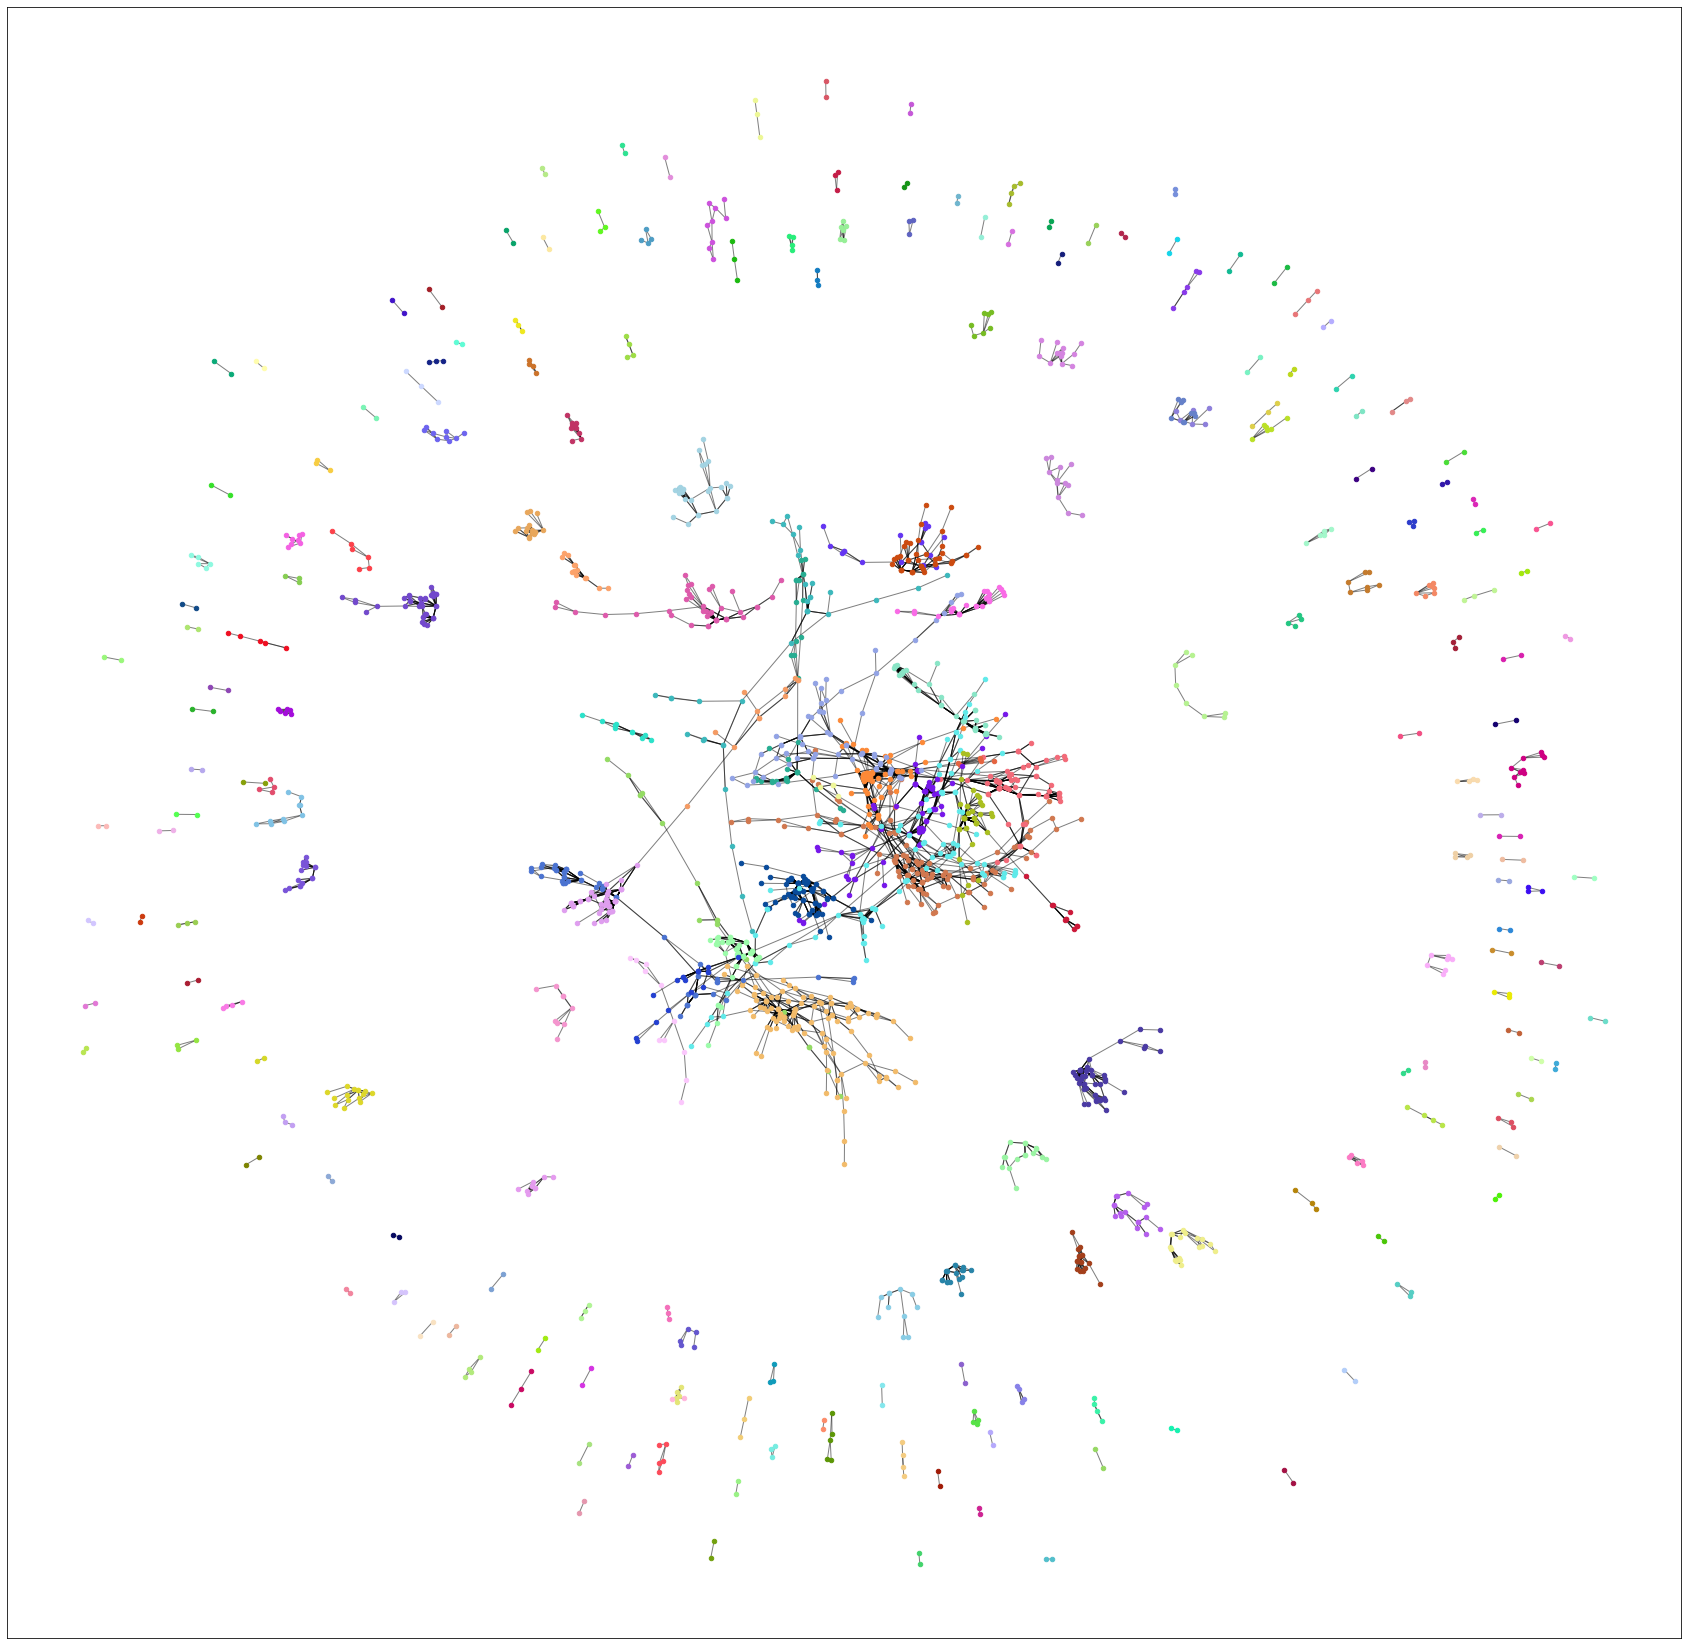

In [113]:
#drawing only nodes with edges
fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(30)
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = randomcolor.RandomColor().generate()[0])


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [114]:
## Code to change color in json
color_dictionary


{'island': '#2425c7',
 '0': '#3ba648',
 '141': '#98899c',
 '92': '#33c31f',
 '39': '#398b4b',
 '8': '#eb54e0',
 '110': '#b95ede',
 '186': '#30d85b',
 '9': '#62a143',
 '217': '#a6c968',
 '5': '#7ebf65',
 '108': '#2815c2',
 '43': '#747a6f',
 '79': '#2b58f2',
 '117': '#6df2db',
 '11': '#544625',
 '2': '#3658cc',
 '4': '#badb5a',
 '41': '#4f453a',
 '95': '#efa643',
 '78': '#329cb8',
 '16': '#4b9413',
 '109': '#6b2c44',
 '10': '#6f6d0c',
 '63': '#cfda21',
 '119': '#9e579f',
 '26': '#aad4f2',
 '173': '#ad5d5a',
 '87': '#4a086a',
 '27': '#7efe1f',
 '13': '#dc0f97',
 '45': '#82d7d2',
 '135': '#d39ec7',
 '57': '#aa425b',
 '69': '#2fecb2',
 '204': '#639887',
 '22': '#7013a6',
 '1': '#629b55',
 '162': '#954413',
 '31': '#2cc1cc',
 '90': '#5667a2',
 '131': '#f98df0',
 '83': '#253462',
 '164': '#47a20f',
 '35': '#a2fd77',
 '214': '#00f2c0',
 '66': '#fc3074',
 '38': '#7b2226',
 '174': '#75f305',
 '156': '#3bbbe4',
 '98': '#76a32b',
 '52': '#e55476',
 '29': '#8a9021',
 '124': '#8a48e0',
 '46': '#eb27

In [115]:
###Only if you need to edit the graph json files

# def filter_dict(d, filter_string):
# #     print(filter_string)
#     for key, val in d.items():
#         if filter_string != key:
#             continue
#         return key, val

# with open('../../visualization/data/graph.json') as graph_json_file:
#     data = json.load(graph_json_file)
#     for node in data['nodes']:
#         if(node['group_id'] == ""):
#             node['group_id']= "island"    
# #             print(node)
    
#     for node in data['nodes']:
#         key,val = filter_dict(color_dictionary, str(node['group_id']))
#         node['color_code'] = val
#         print(node)


In [116]:
#Resave as JSON

# graph = {
#     "nodes" : data['nodes'],
#     "links": data['links']
# }

# with open("../generated-data/graph.json", 'w') as file:
#     json.dump(graph, file)

In [117]:
import pandas as pd

In [118]:
signs_latest_csv = pd.read_csv('../signdata-07-08-2020.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../signdata-07-08-2020.csv'

In [ ]:
signs_latest_csv['Iconicity(Z)'].max()